# HWES 

In [350]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime 
from statsmodels.tsa.seasonal import seasonal_decompose

In [351]:
df=pd.read_csv("./data/retail_store_inventory.csv")
df = df[df['Category'] == 'Clothing']
df

Date Store ID Product ID  Category Region  Inventory Level  \
7      2022-01-01     S001      P0008  Clothing  North              380   
11     2022-01-01     S001      P0012  Clothing   West               66   
13     2022-01-01     S001      P0014  Clothing   West              193   
14     2022-01-01     S001      P0015  Clothing  North              379   
17     2022-01-01     S001      P0018  Clothing  South              241   
...           ...      ...        ...       ...    ...              ...   
73068  2024-01-01     S004      P0009  Clothing   East              115   
73071  2024-01-01     S004      P0012  Clothing   East               85   
73075  2024-01-01     S004      P0016  Clothing   West              314   
73078  2024-01-01     S004      P0019  Clothing   East               65   
73097  2024-01-01     S005      P0018  Clothing   West              278   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
7             312             54           329.73  97.99         5   
11             24             70            26.75  58.25        20   
13             12            187             6.80  78.11         0   
14            369            154           363.46  92.99        15   
17            151             47           147.27  19.57         5   
...           ...            ...              ...    ...       ...   
73068          47            139            66.94  48.65        10   
73071          63             36            63.69  11.65         5   
73075         182            148           193.14  19.12         0   
73078          44            166            43.07  61.04         0   
73097          36            151            39.65  11.11        10   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
7                Cloudy                  0              100.09      Spring  
11                Snowy                  0               62.21      Spring  
13                Sunny                  0               80.06      Spring  
14                Snowy                  0               95.80      Winter  
17               Cloudy                  0               23.13      Autumn  
...                 ...                ...                 ...         ...  
73068             Snowy                  0               49.74      Winter  
73071             Rainy                  0                7.14      Summer  
73075             Rainy                  0               20.11      Winter  
73078             Snowy                  0               60.99      Summer  
73097             Rainy                  0               10.91      Winter  

[14626 rows x 15 columns]

In [352]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b')

In [353]:
df['Date'] 

7       2022-01-01
11      2022-01-01
13      2022-01-01
14      2022-01-01
17      2022-01-01
           ...    
73068   2024-01-01
73071   2024-01-01
73075   2024-01-01
73078   2024-01-01
73097   2024-01-01
Name: Date, Length: 14626, dtype: datetime64[ns]

In [354]:
list_product_id = df['Product ID'].unique()

In [355]:
list_product_id

array(['P0008', 'P0012', 'P0014', 'P0015', 'P0018', 'P0019', 'P0002',
       'P0009', 'P0013', 'P0005', 'P0017', 'P0003', 'P0020', 'P0007',
       'P0010', 'P0016', 'P0006', 'P0011', 'P0001', 'P0004'], dtype=object)

In [ ]:
df_product_01 = df[df['Product ID'] == 'P0001']
df_product_01 = df_product_01.set_index(df_product_01['Date'])
df_product_01 = df_product_01.groupby(pd.Grouper(key='Date', freq='W'))['Units Sold'].sum()
df_product_01 = df_product_01[df_product_01 > 0]
df_product_01 

Date
2022-01-09    1069
2022-01-16     500
2022-01-23    1079
2022-01-30    1378
2022-02-06    1609
              ... 
2023-12-10     574
2023-12-17     950
2023-12-24     966
2023-12-31     216
2024-01-07     132
Freq: W-SUN, Name: Units Sold, Length: 105, dtype: int64

In [357]:
df_product_01.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 105 entries, 2022-01-09 to 2024-01-07
Freq: W-SUN
Series name: Units Sold
Non-Null Count  Dtype
--------------  -----
105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


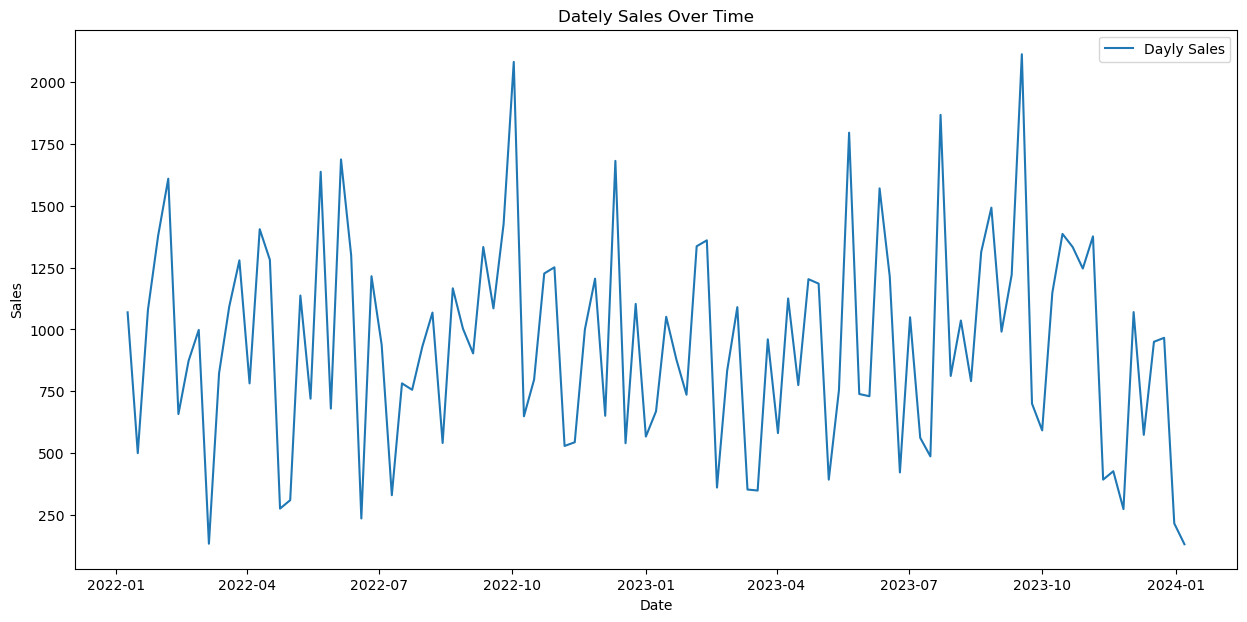

In [358]:
plt.figure(figsize=(15, 7))
plt.plot(df_product_01, label='Dayly Sales') 
plt.title('Dately Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show() 

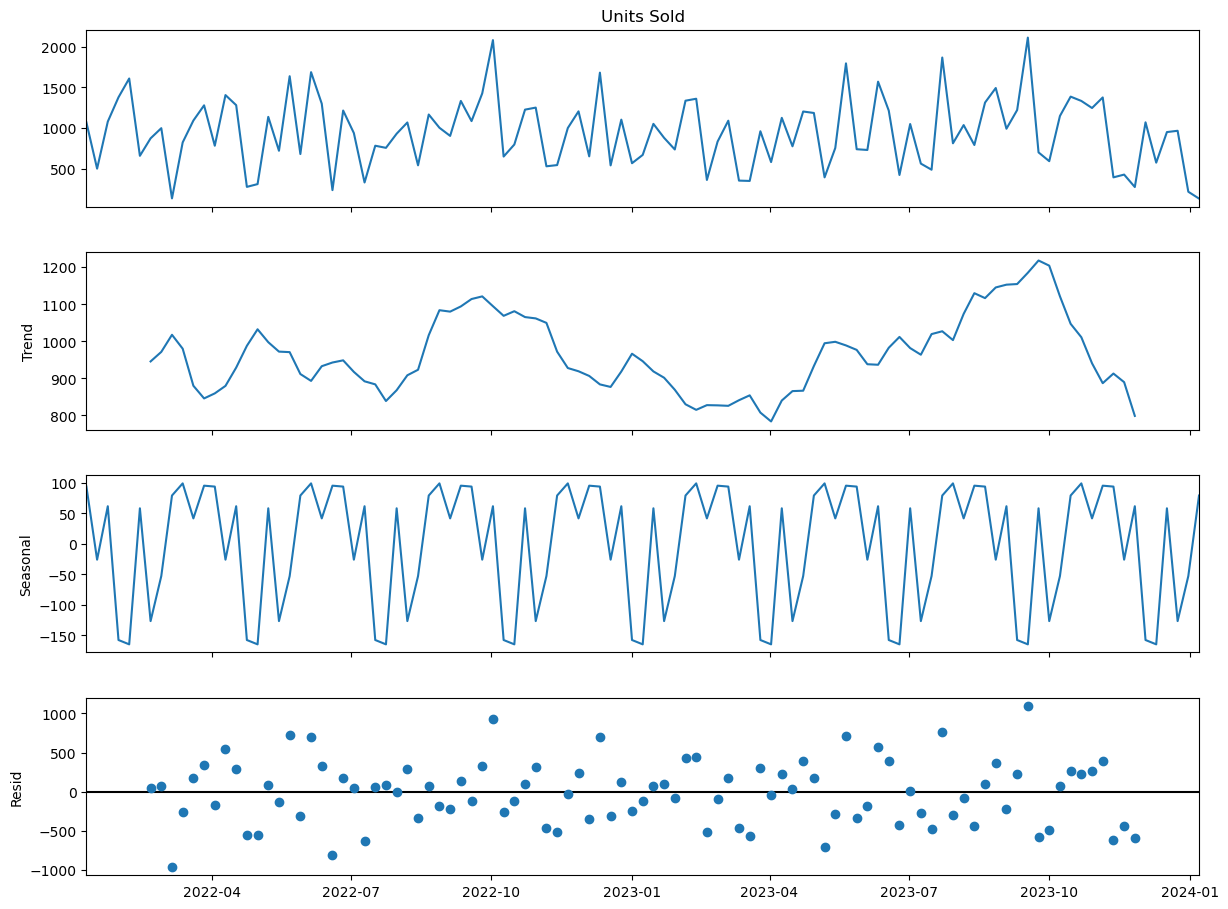

In [359]:
decomposition = seasonal_decompose(df_product_01, model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

In [360]:
models = []
specifications_product_01 = [
  {
    'name': 'Fixed Parameters', 
    'model': ExponentialSmoothing(
      df_product_01, seasonal_periods=52, trend='add', seasonal='add', damped_trend=True
    ).fit(
      smoothing_level=0.2, 
      smoothing_trend=0.1, 
      smoothing_seasonal=0.1, 
      damping_trend=0.98, 
      optimized=True, 
    )
  }, 
  {
    'name': 'Multiplicative Seasonal', 
    'model': ExponentialSmoothing(
      df_product_01, seasonal_periods=52, trend='add', seasonal='mul', damped_trend=True
    ).fit(
      smoothing_level=0.2, 
      smoothing_trend=0.1,
      smoothing_seasonal=0.1,
      damping_trend=0.98,
      optimized=True
    )
  }, 
  {
    'name': 'Multiplicative Trend', 
    'model': ExponentialSmoothing(
      df_product_01, seasonal_periods=52, trend='mul', seasonal='add', damped_trend=True
    ).fit(
      smoothing_level=0.2,
      smoothing_trend=0.1, 
      smoothing_seasonal=0.1, 
      damping_trend=0.98, 
      optimized=True
    )
  }
]

c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [361]:
specifications_product_01

[{'name': 'Fixed Parameters',
  'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x13dd3449e80>},
 {'name': 'Multiplicative Seasonal',
  'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x13dddc3eb70>},
 {'name': 'Multiplicative Trend',
  'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x13dddb91130>}]

In [362]:
results = []
for spec in specifications_product_01: 
  model = spec['model']
  name = spec['name']
  rmse = np.sqrt(mean_squared_error(df_product_01, model.fittedvalues))
  mae = mean_absolute_error(df_product_01, model.fittedvalues)
  results.append({
    'name': name, 
    'rmse': rmse, 
    'mae': mae, 
    'model': model
  })

In [363]:
results 

[{'name': 'Fixed Parameters',
  'rmse': 345.7380064339825,
  'mae': 273.5640331141105,
  'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x13dd3449e80>},
 {'name': 'Multiplicative Seasonal',
  'rmse': 362.5363371483598,
  'mae': 294.0972697657814,
  'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x13dddc3eb70>},
 {'name': 'Multiplicative Trend',
  'rmse': 346.2830033592615,
  'mae': 273.3665678494298,
  'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x13dddb91130>}]

In [364]:
# best_model = min(results, key=lambda x: x['rmse'])
# hw_model = best_model['model']
# # Tự tạo index cho forecast:
# hw_forecast = hw_model.forecast(52)
# hw_forecast.index = pd.date_range(start=df_product_01.index[-1] + pd.Timedelta(days=1), periods=52, freq='W-MON')
hw_model = results[2]['model']
hw_forecast = hw_model.forecast(52)
hw_forecast.index = pd.date_range(start=df_product_01.index[-1] + pd.Timedelta(days=1), periods=52, freq='W-MON')

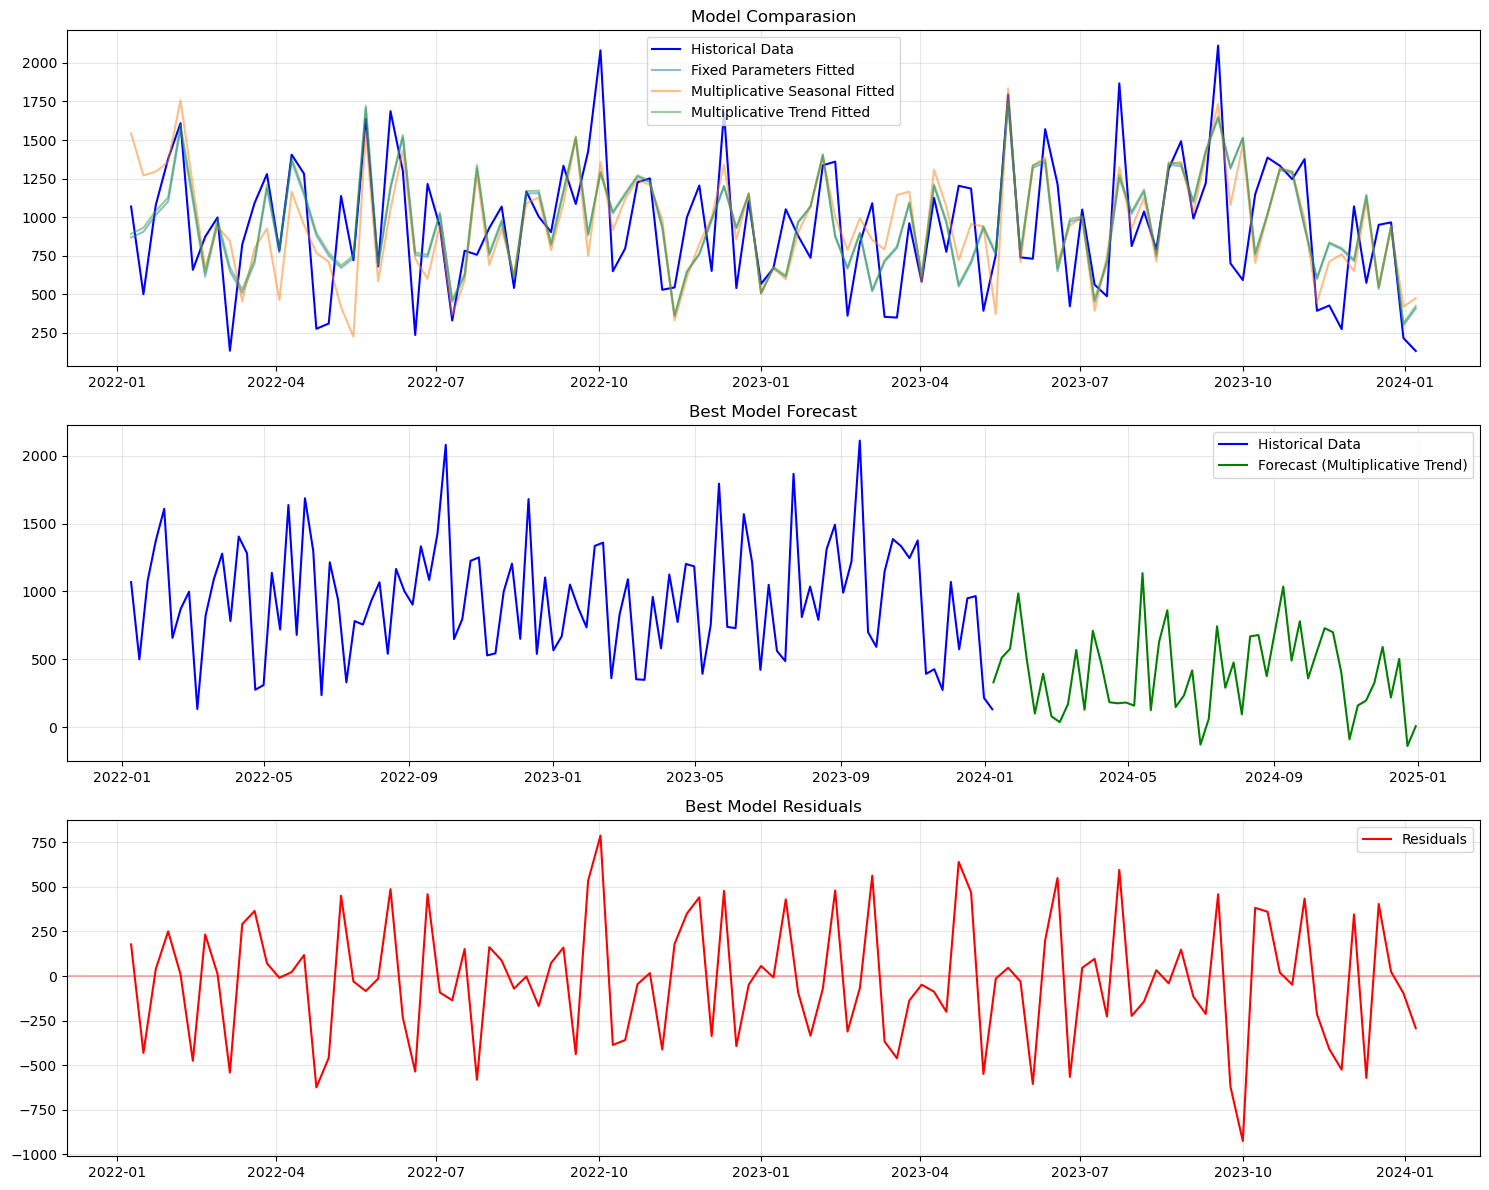

In [365]:
plt.figure(figsize=(15,12))
#First subplot: All models 
plt.subplot(3,1,1)
plt.plot(df_product_01.index, df_product_01, label='Historical Data', color='blue')
for result in results: 
  plt.plot(result['model'].fittedvalues.index, result['model'].fittedvalues, label=f"{result['name']} Fitted", alpha=0.5) 
plt.title('Model Comparasion')
plt.legend() 
plt.grid(True, alpha=0.3)
#Second subplot: Best model forecast 
plt.subplot(3,1,2)
plt.plot(df_product_01.index, df_product_01, label='Historical Data', color='blue')
plt.plot(hw_forecast.index, hw_forecast, label=f"Forecast ({results[2]["name"]})", color="green")
plt.title('Best Model Forecast')
plt.legend()
plt.grid(True, alpha=0.3)
#Third subplot: Residuals of best model 
plt.subplot(3,1,3)
residuals = df_product_01 - hw_model.fittedvalues 
plt.plot(df_product_01.index, residuals, label='Residuals', color='red')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Best Model Residuals')
plt.legend()
plt.grid(True, alpha=0.3) 
plt.tight_layout()
plt.show()

105


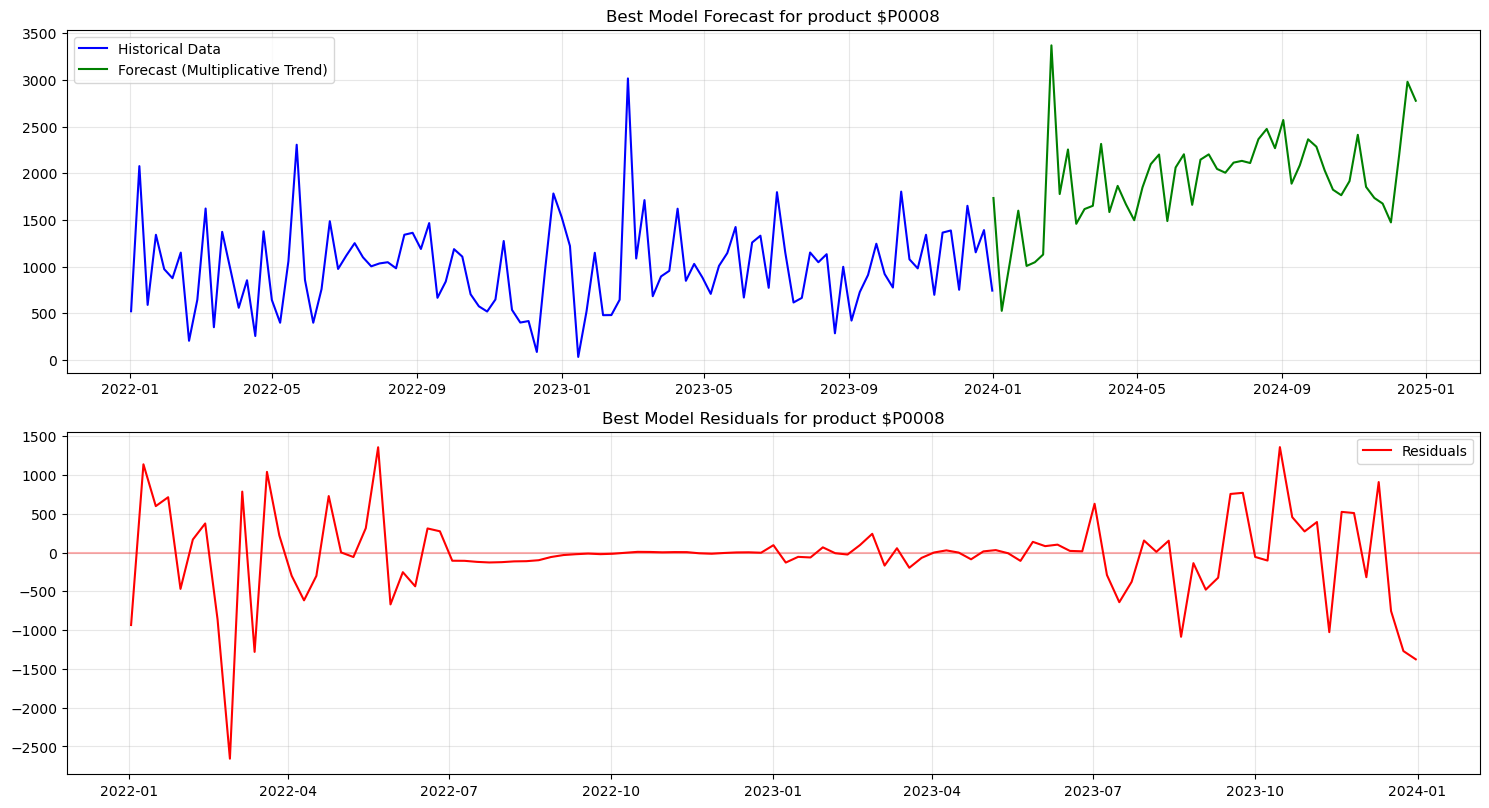

106


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


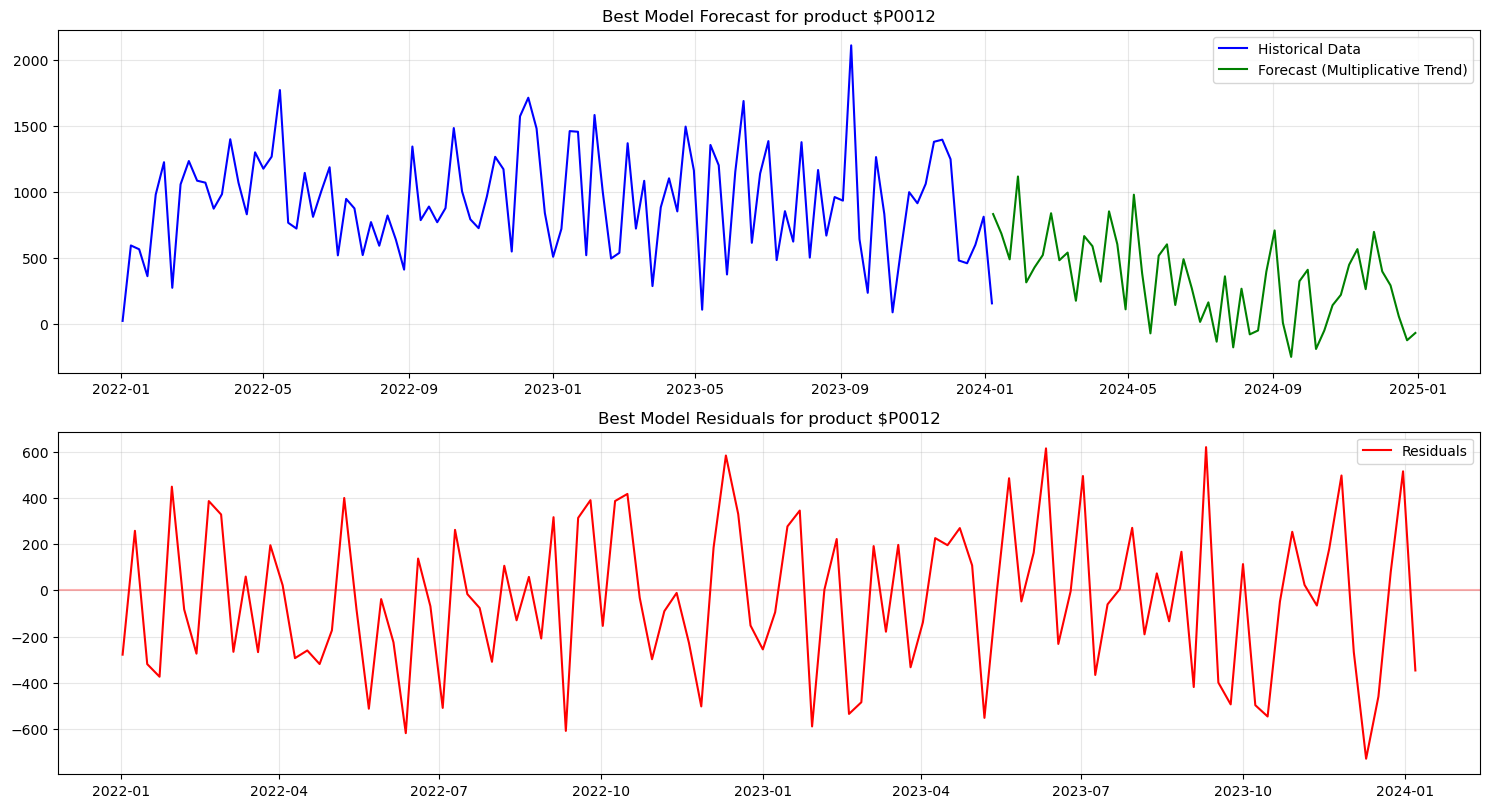

106


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


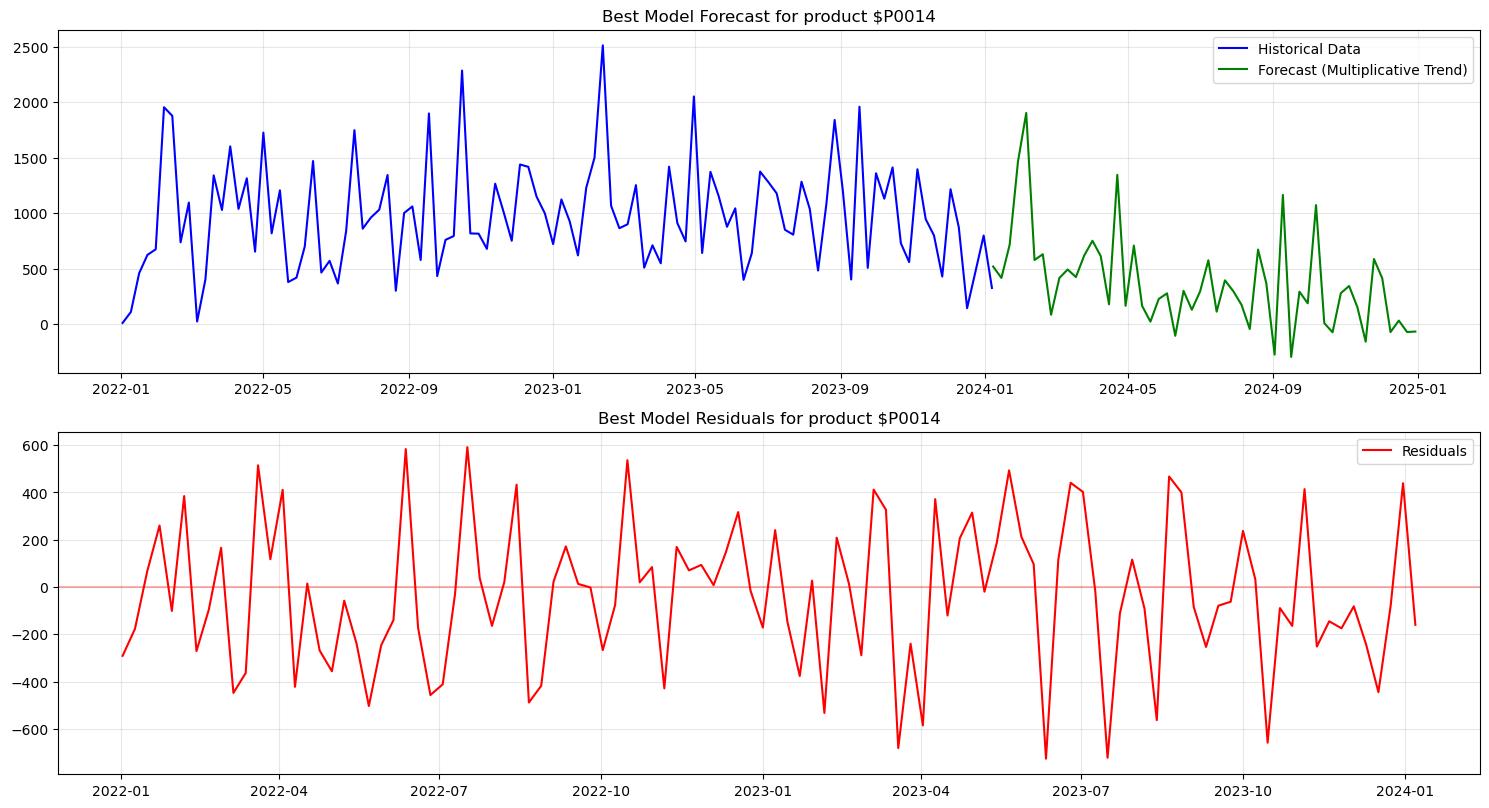

106


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


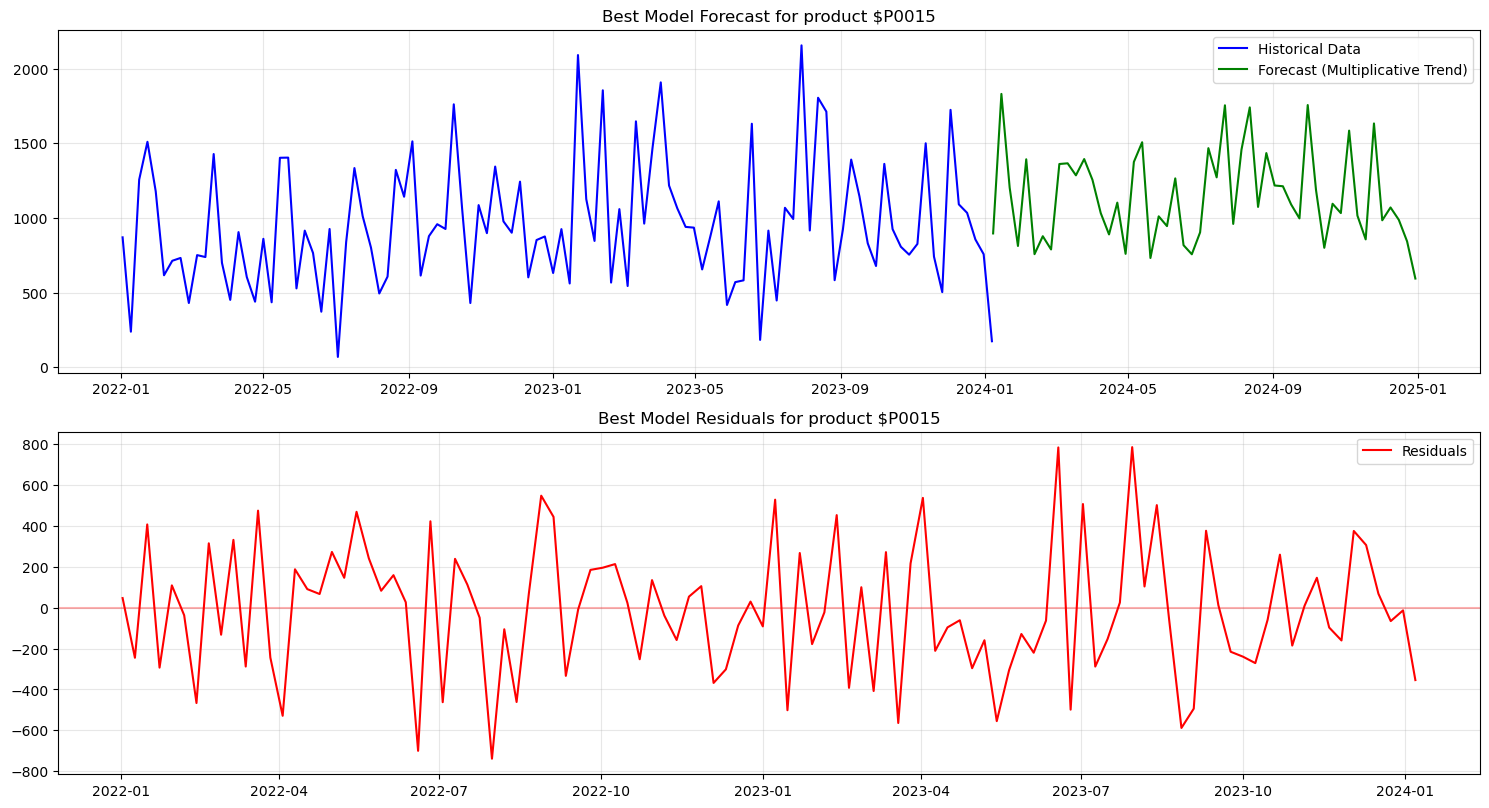

106


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


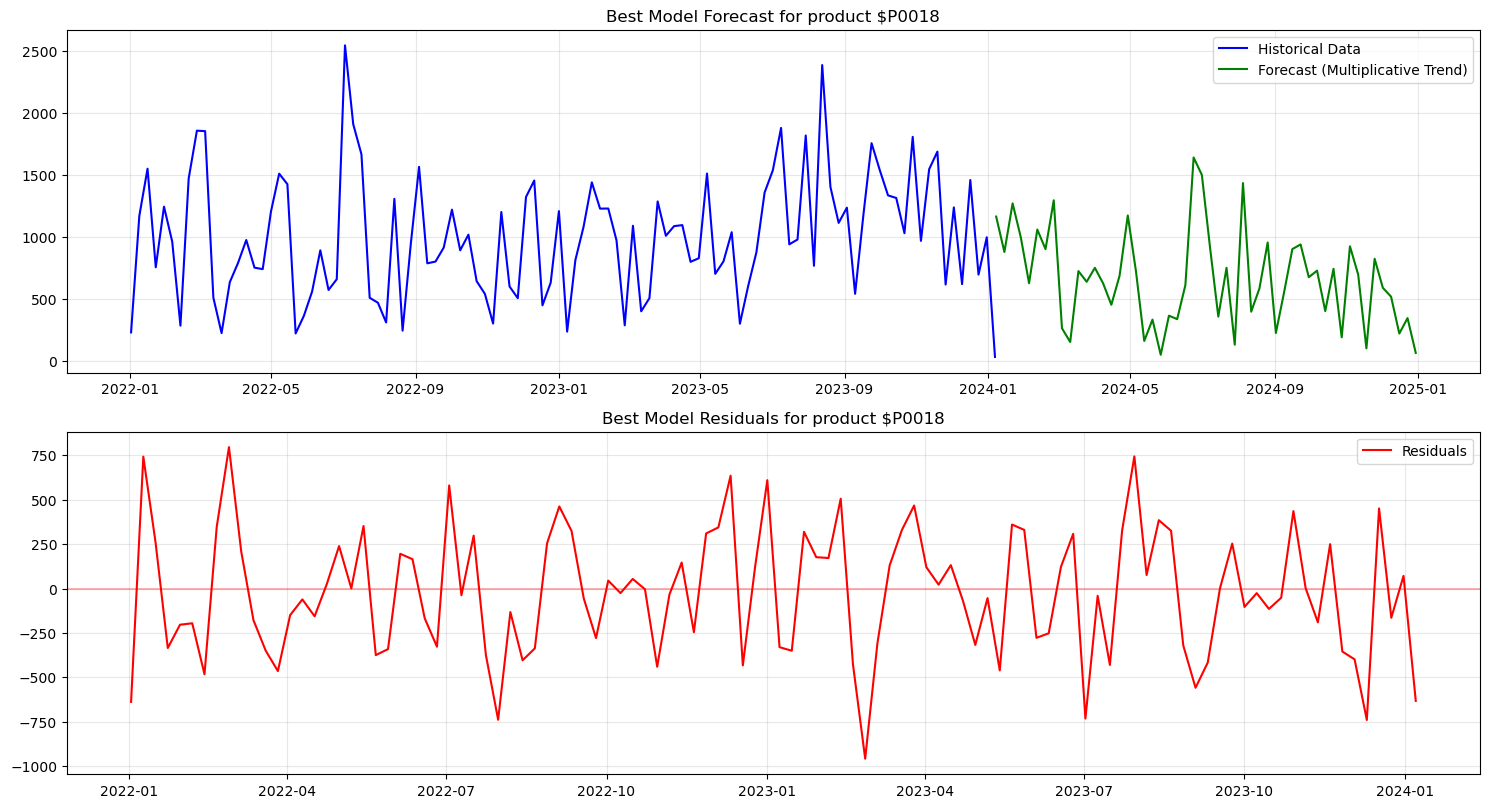

106


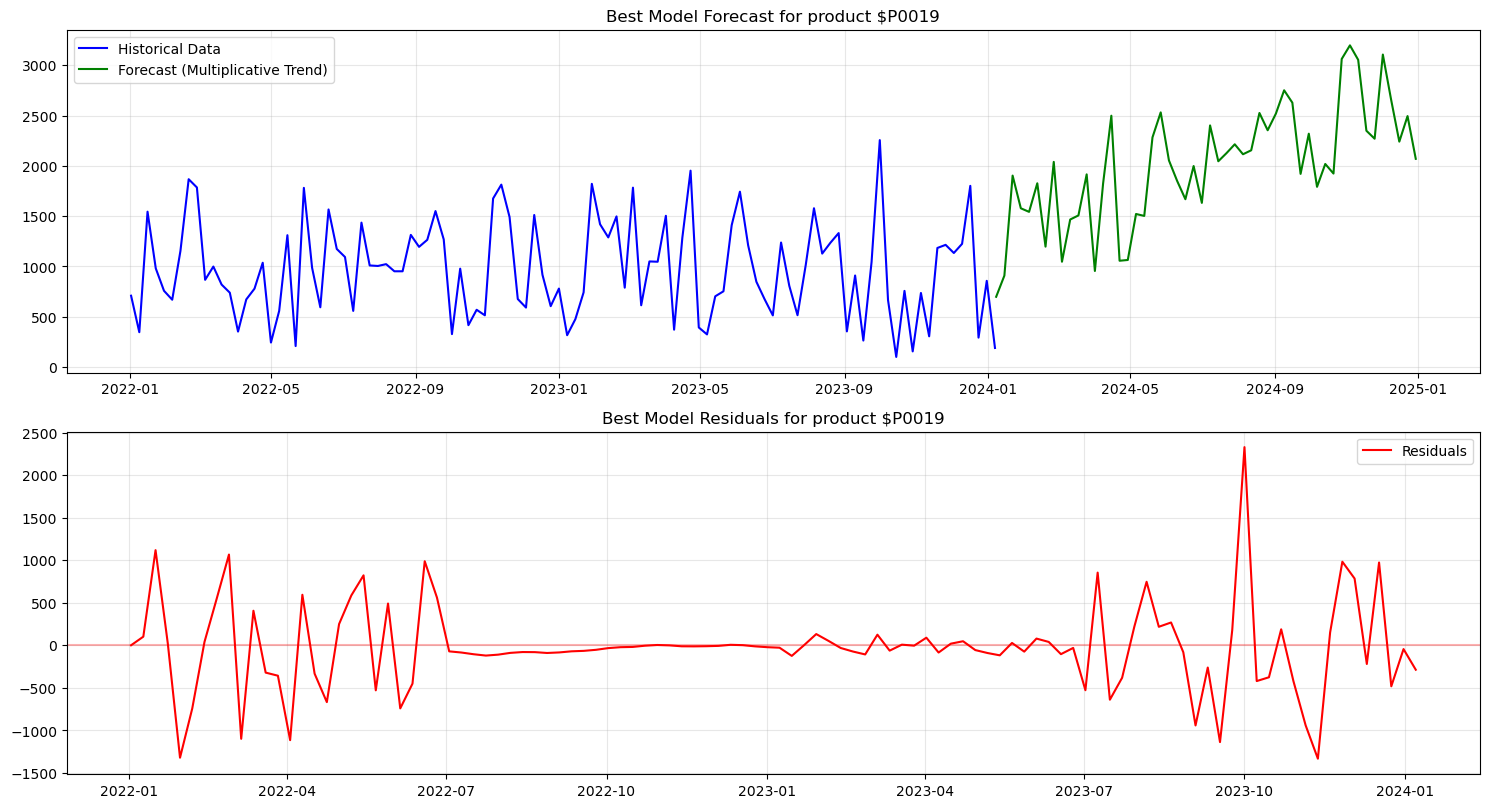

105


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


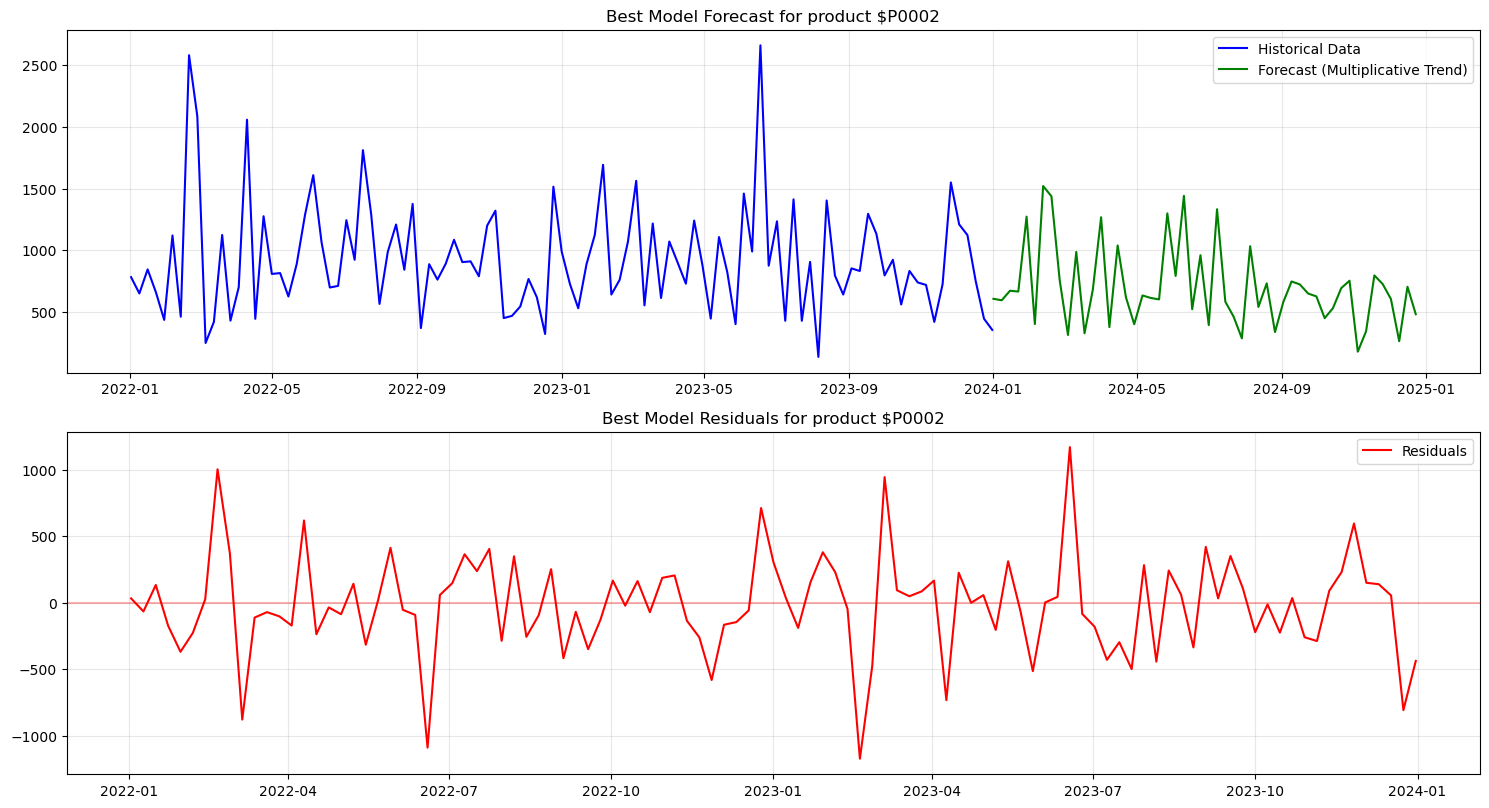

106


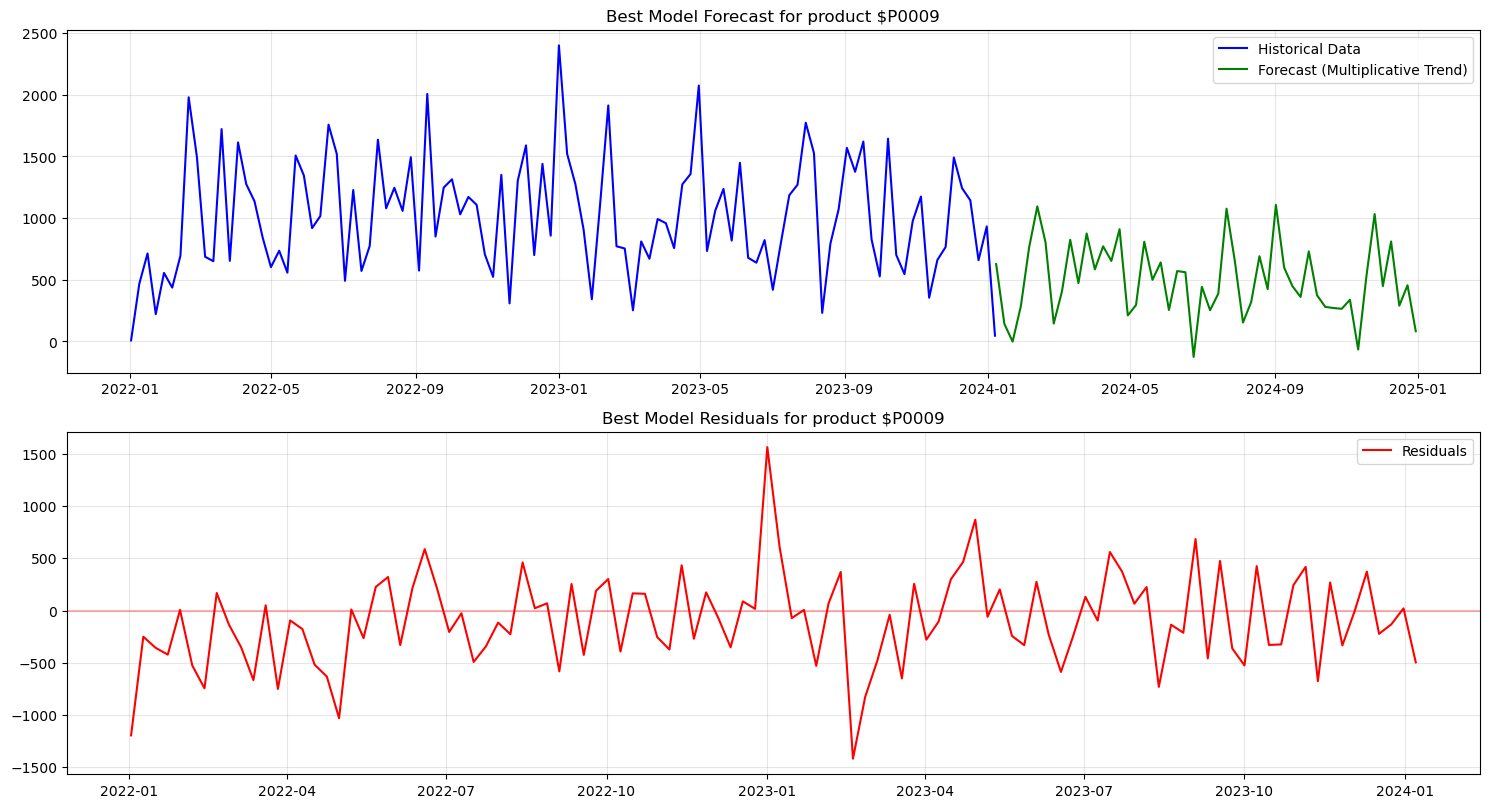

105


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


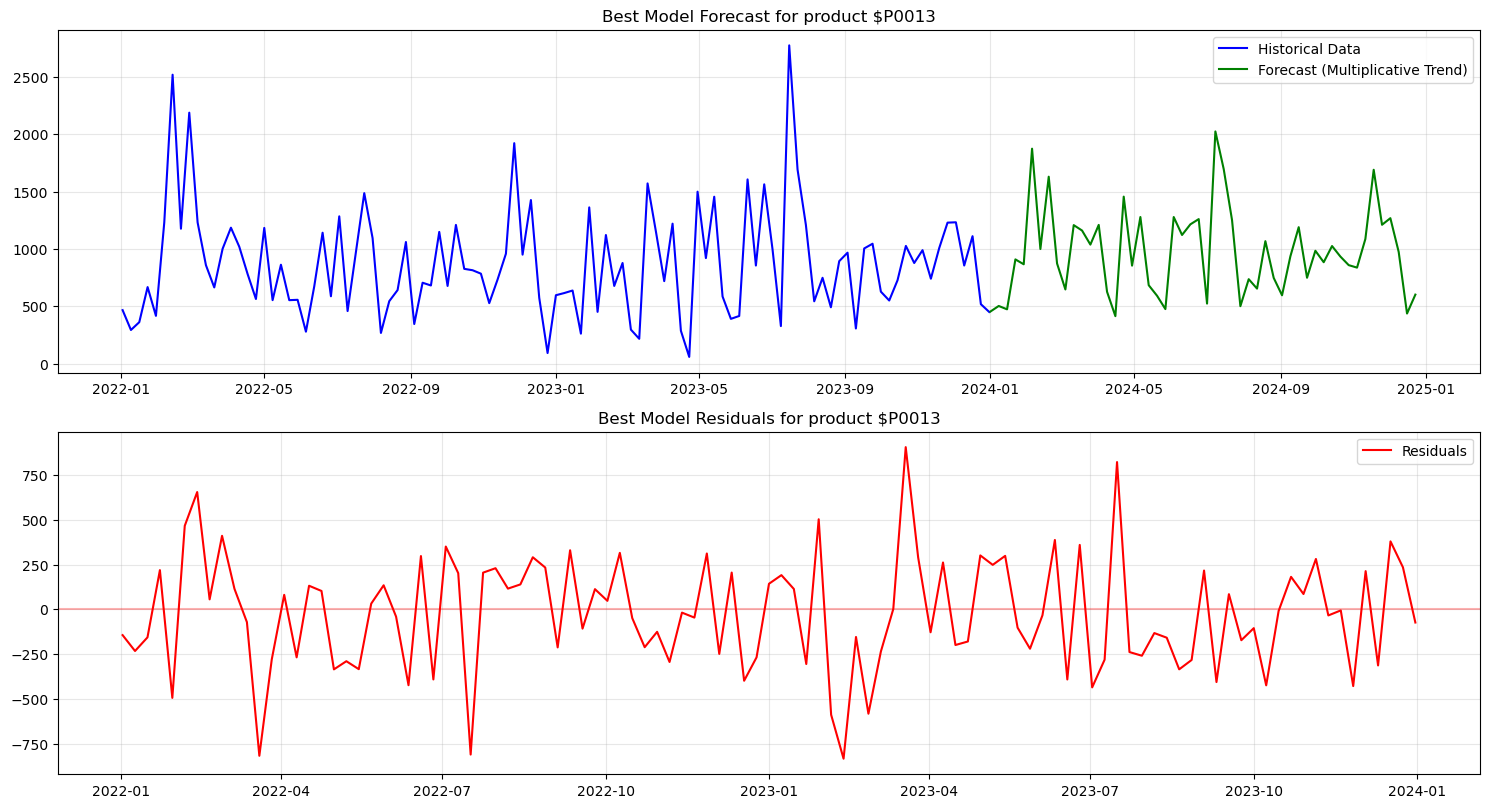

105


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


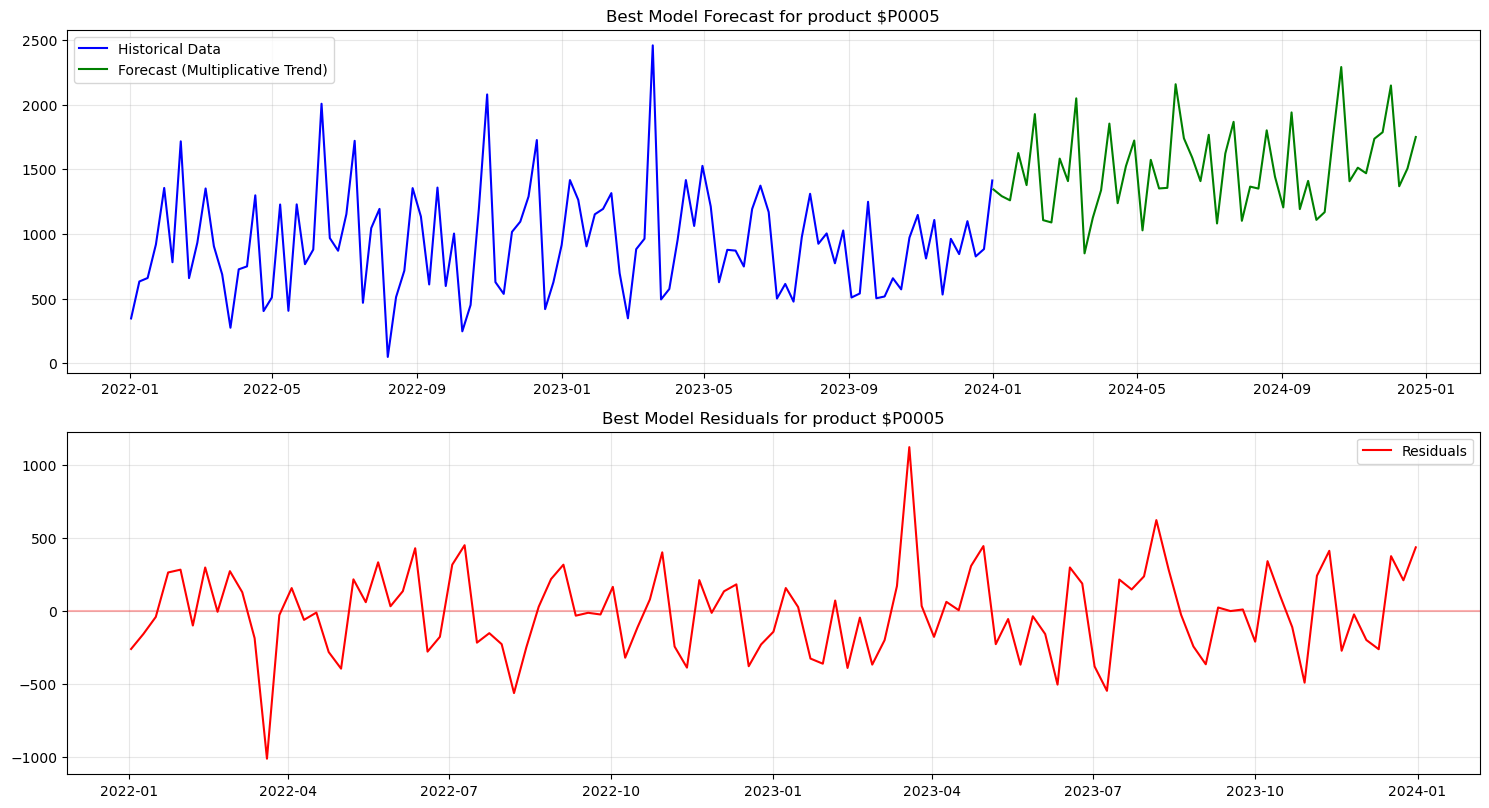

106


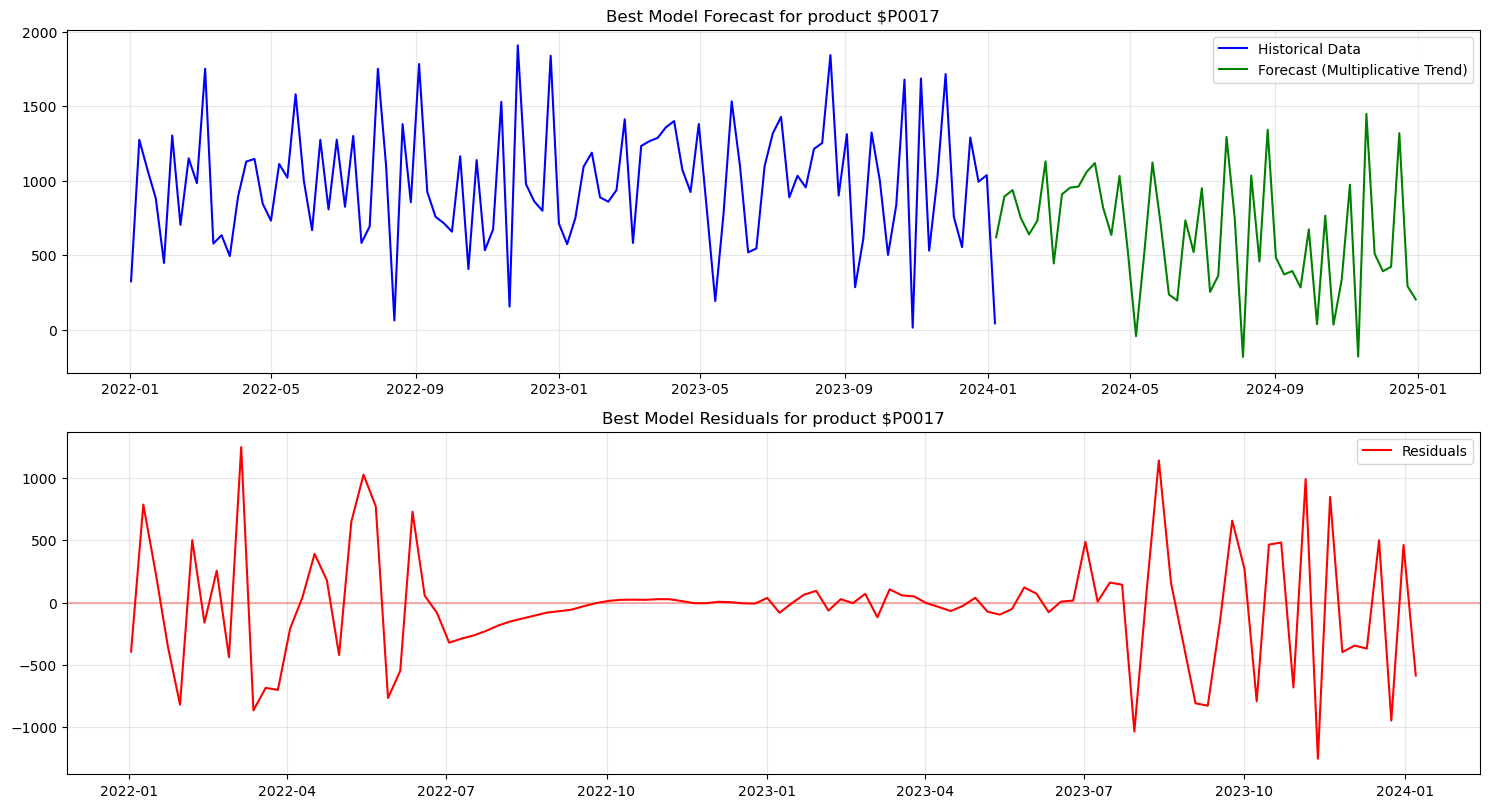

106


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


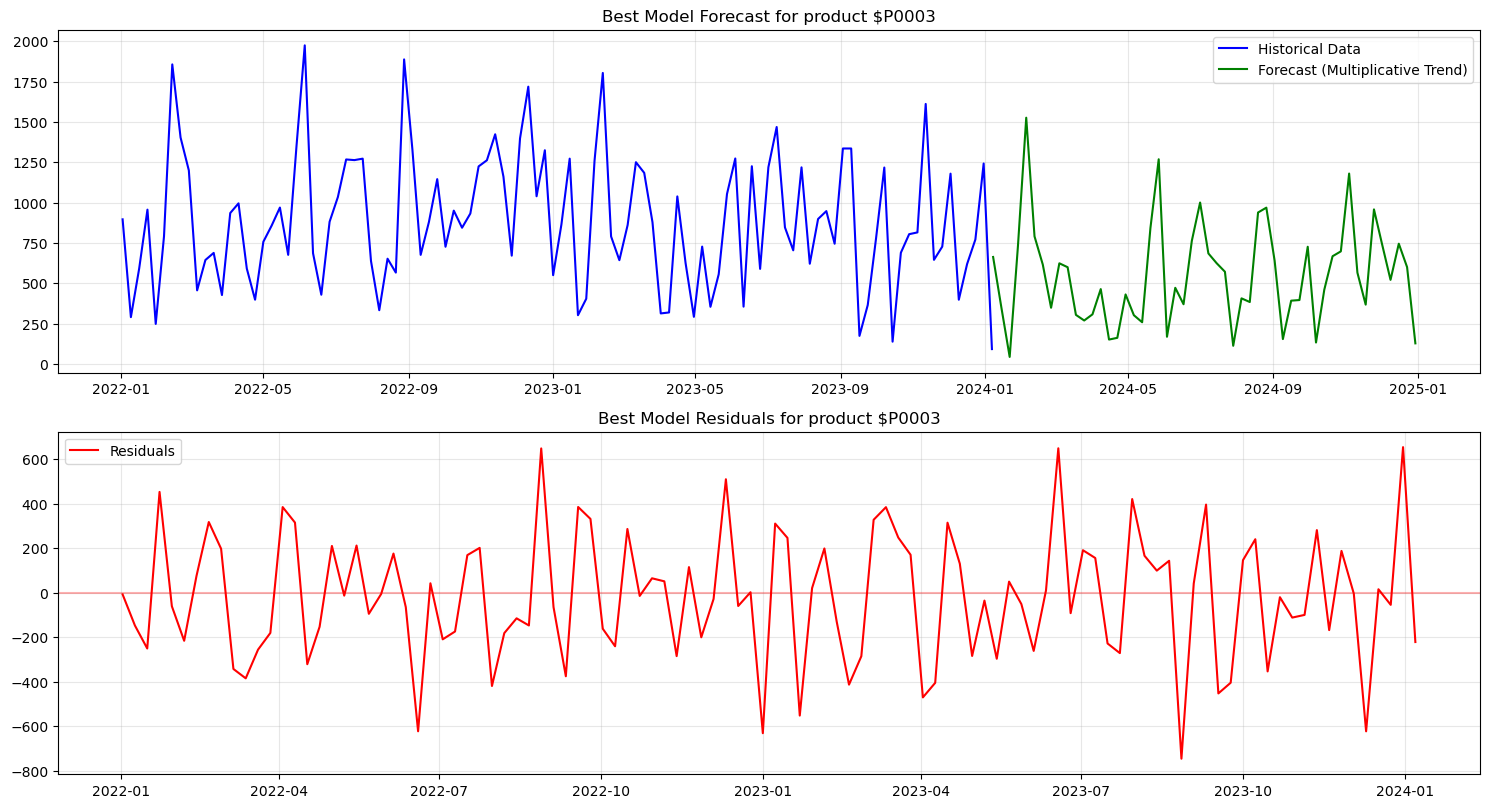

105


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


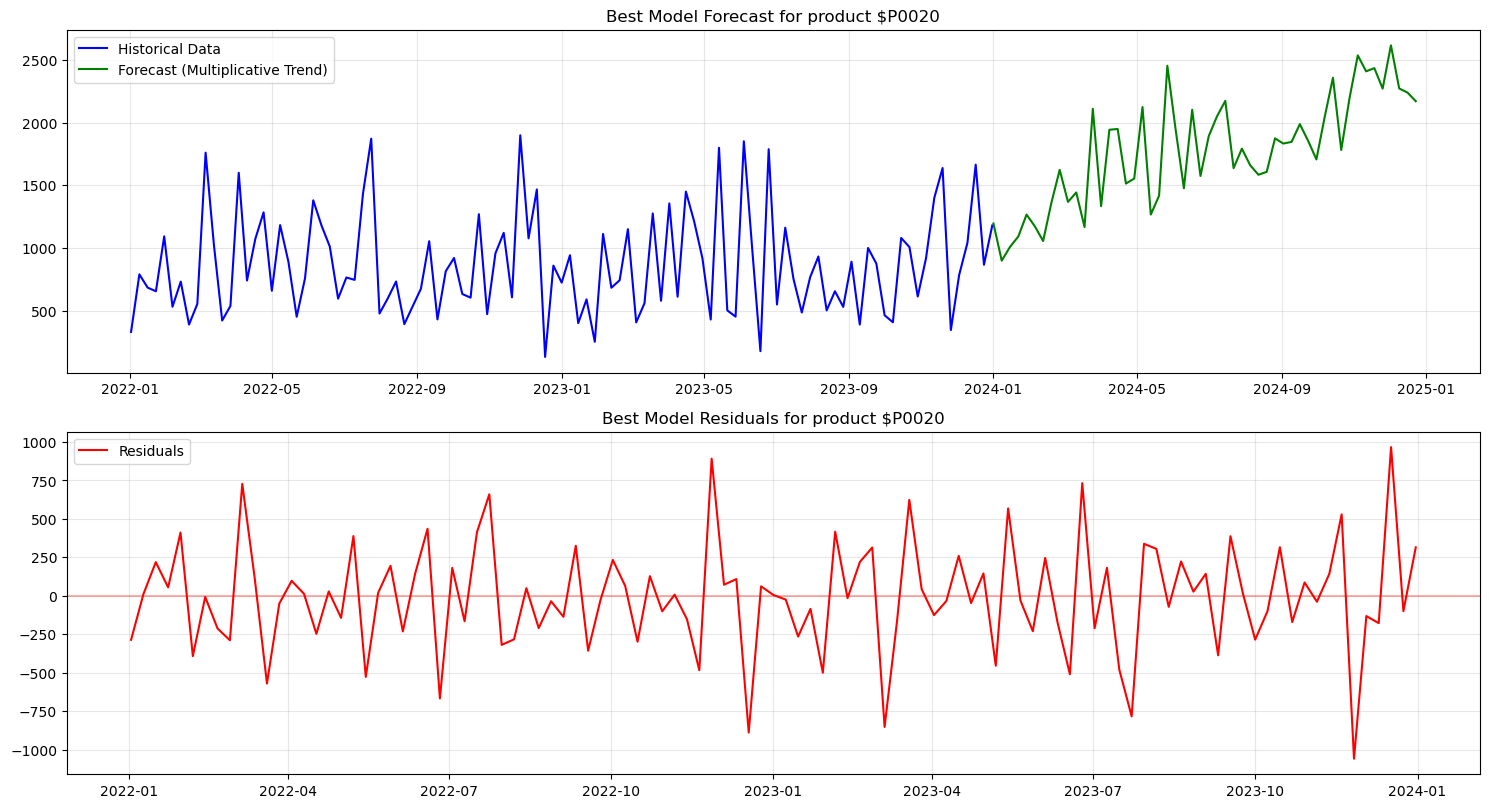

106


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


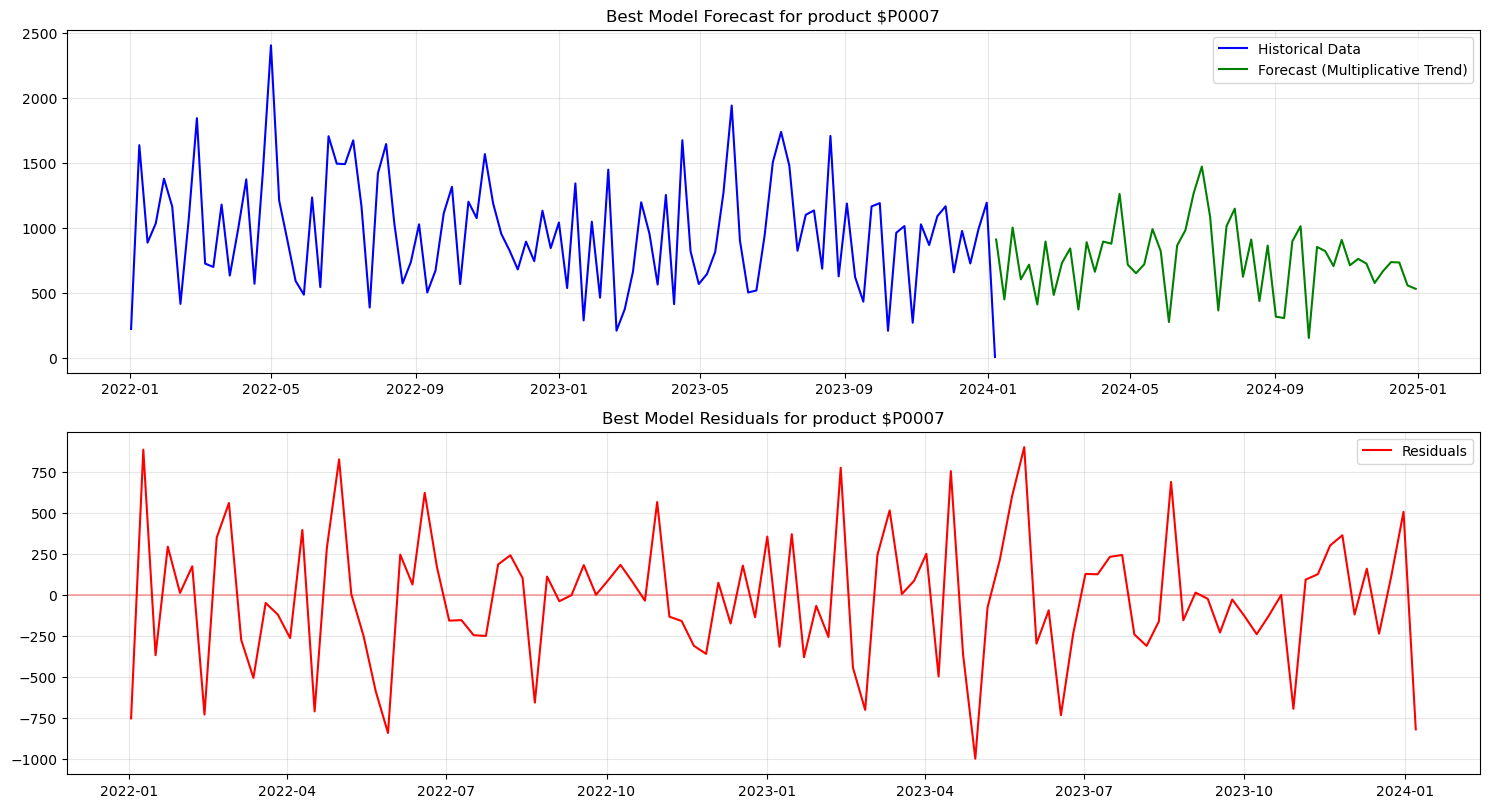

105


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


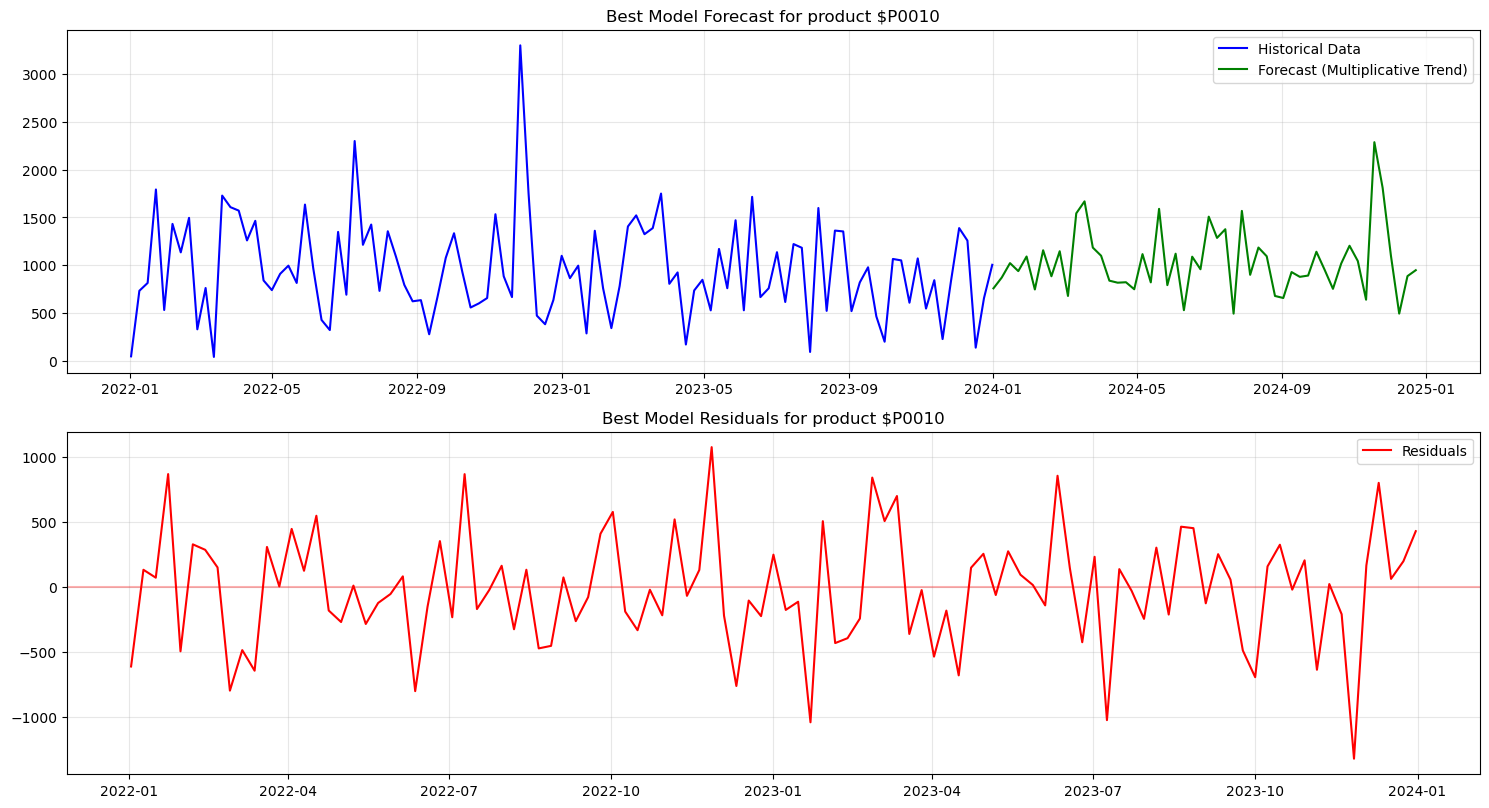

106


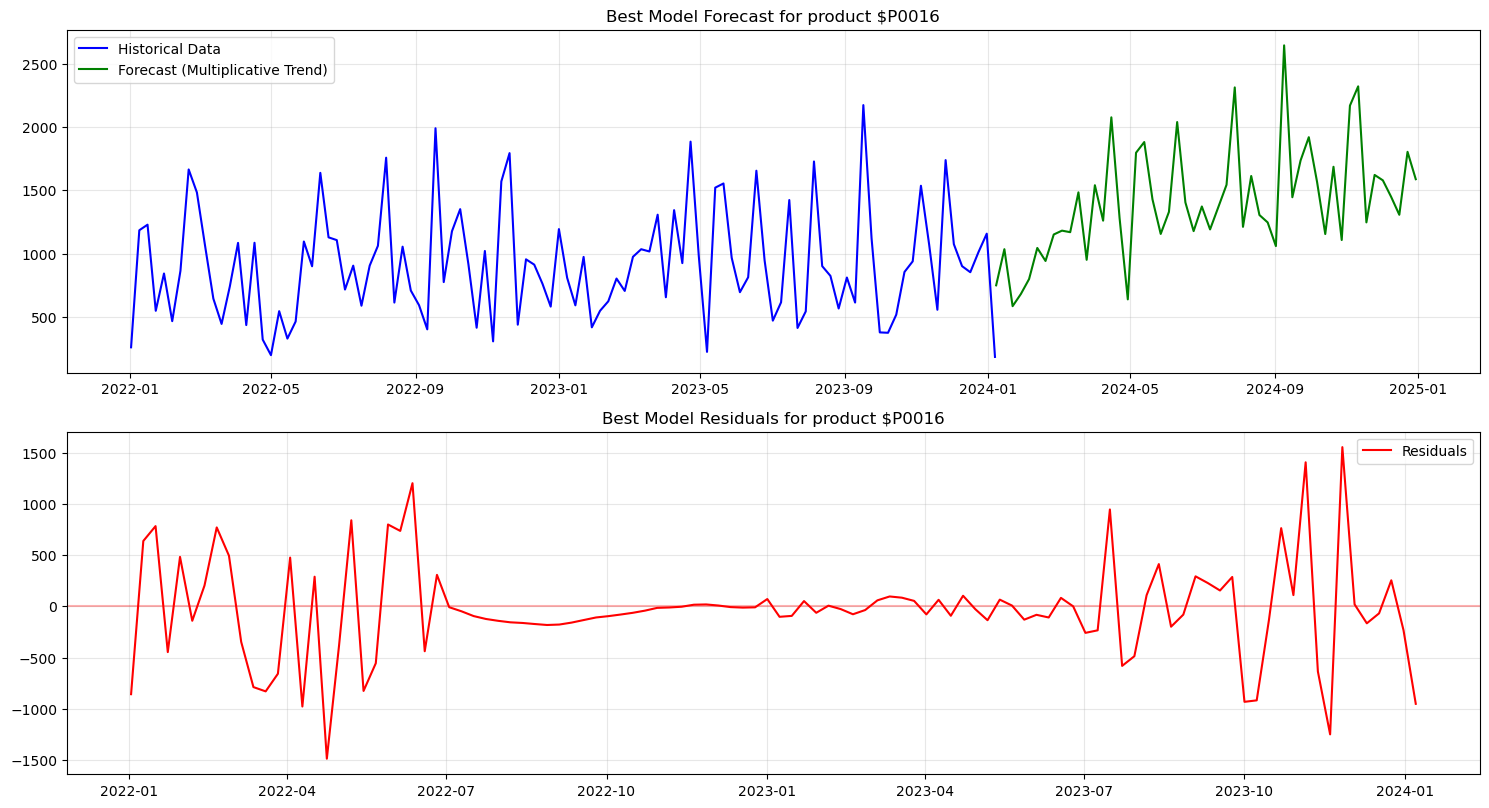

105


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


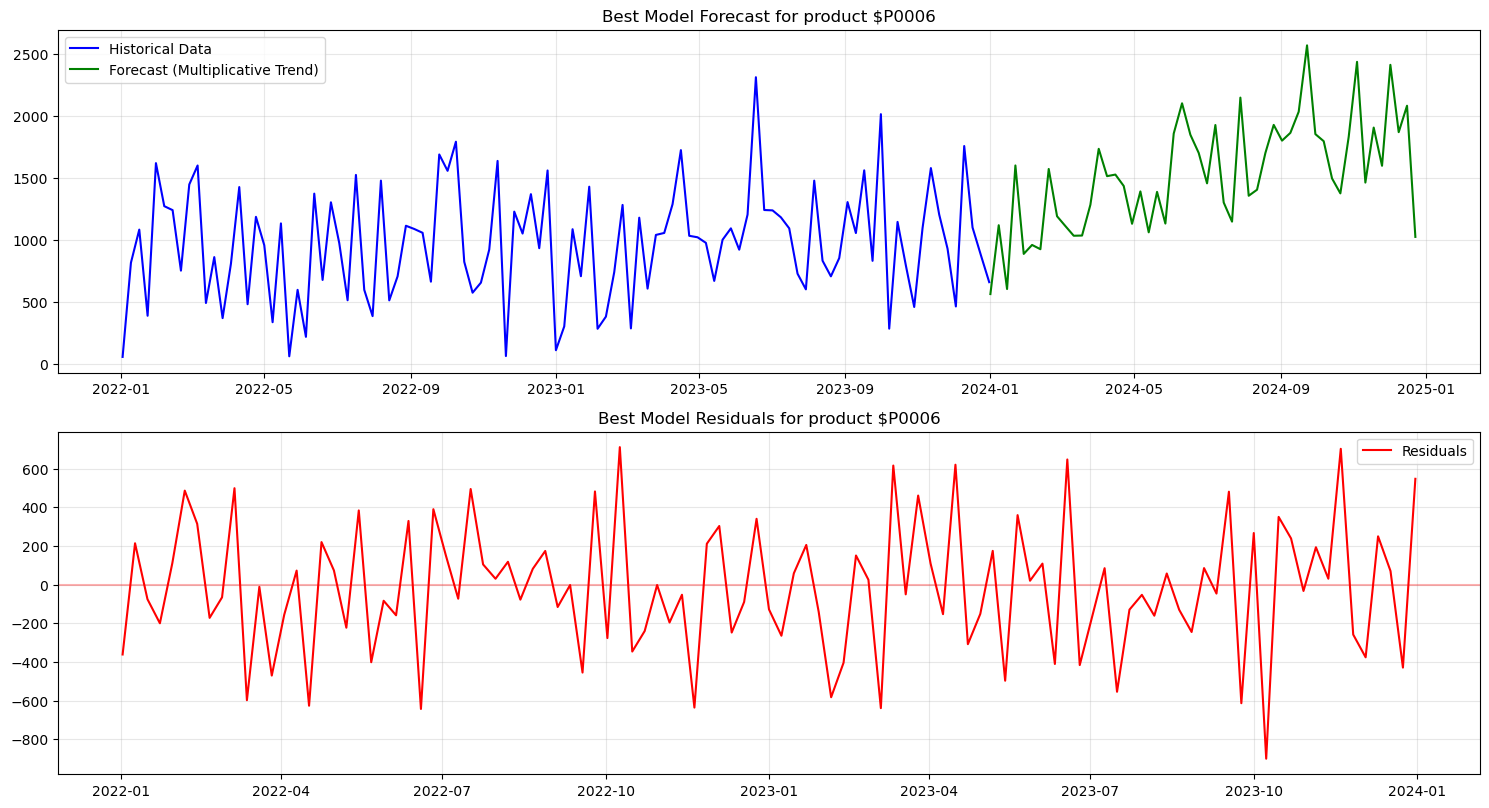

104


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


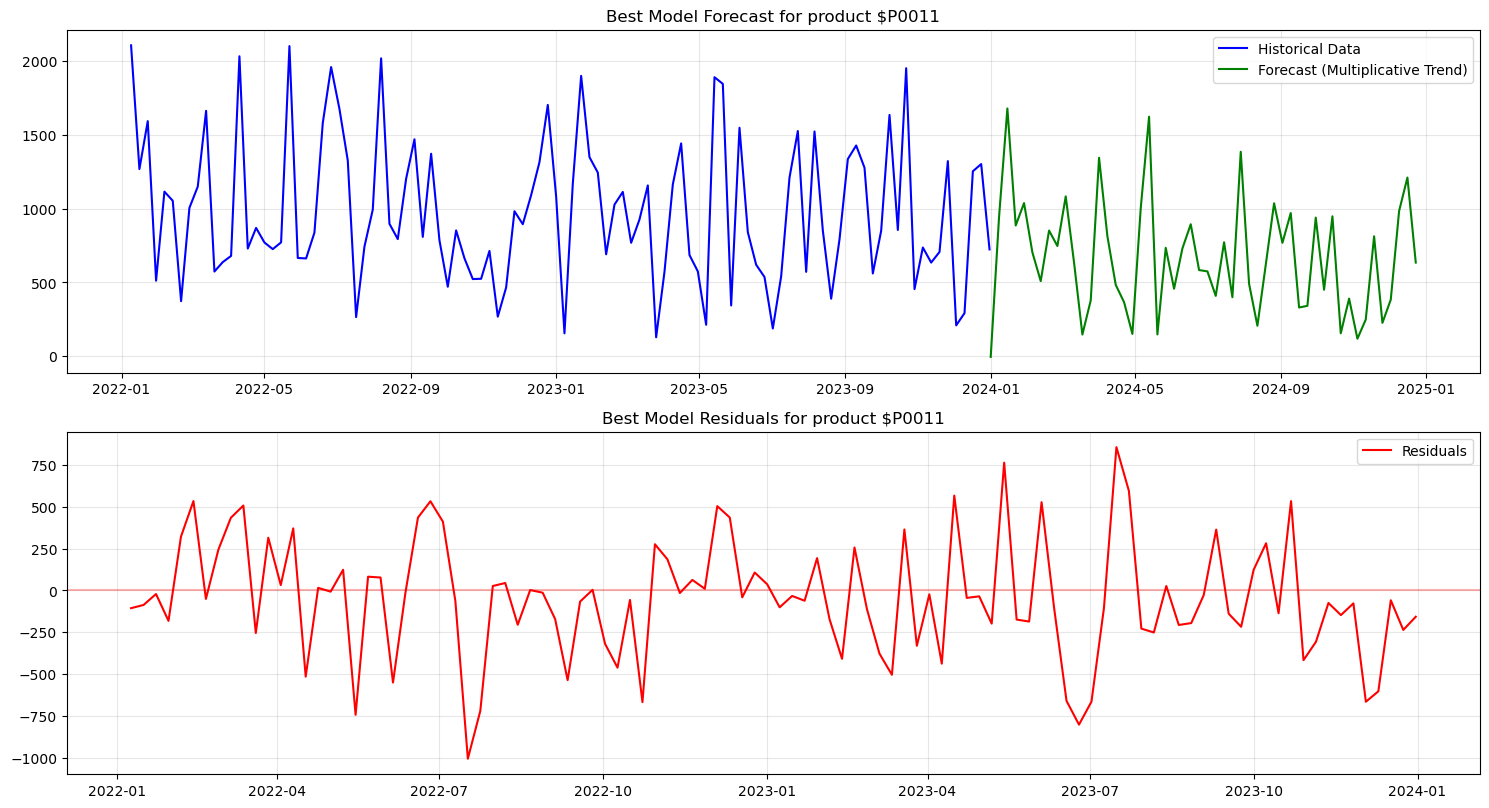

105


c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


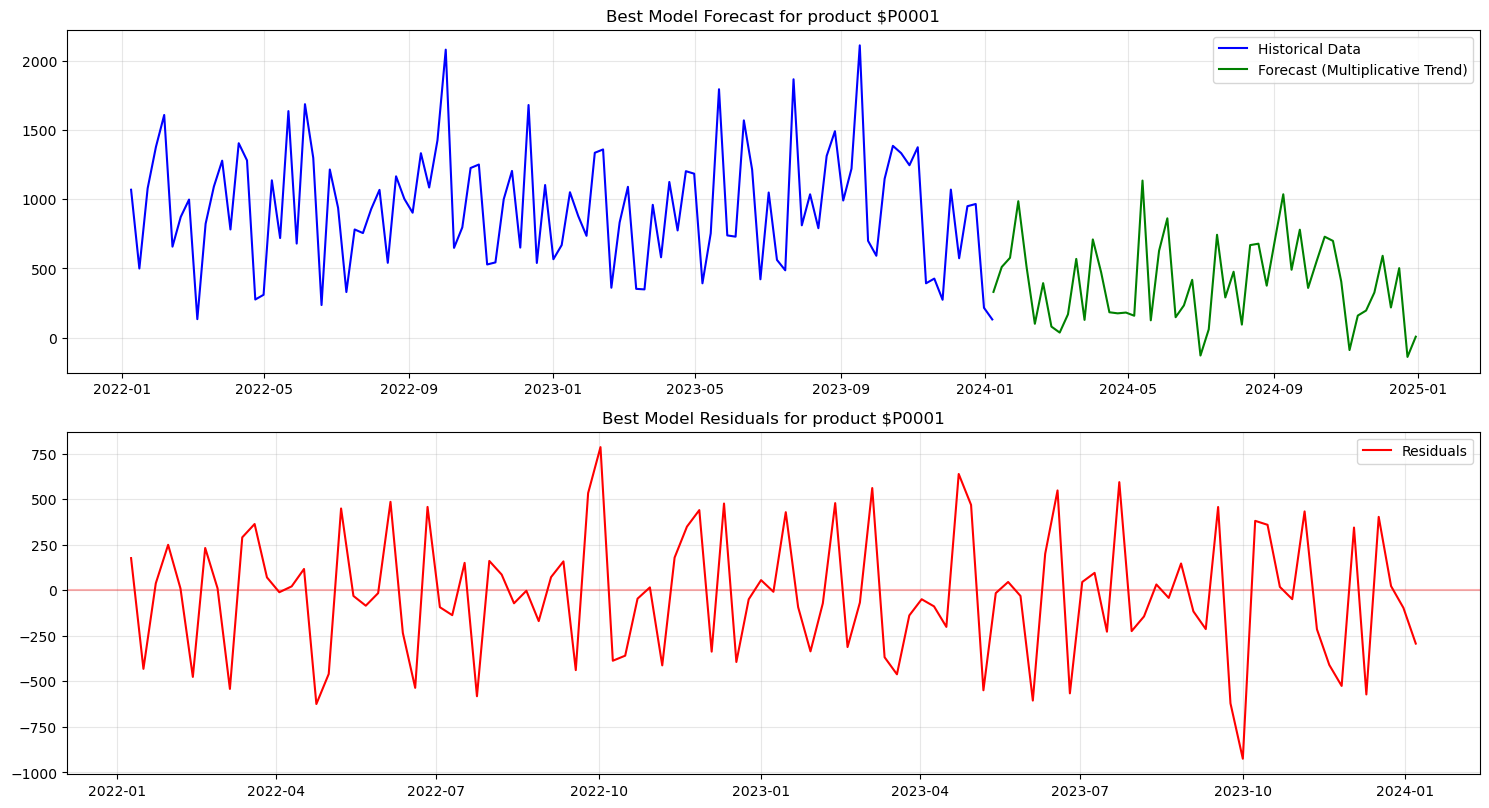

104


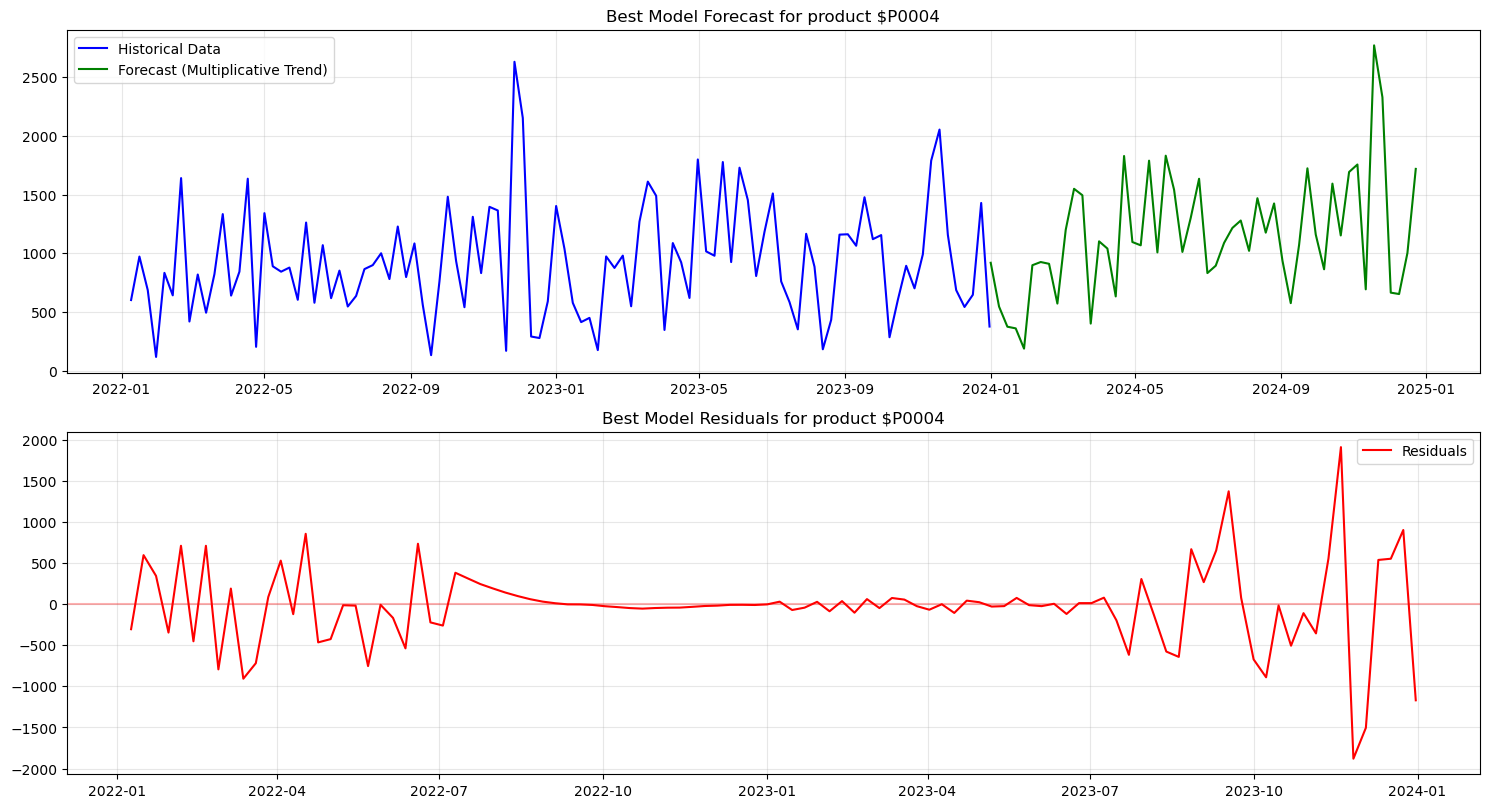

In [366]:
for product_id in list_product_id: 
  df_product_i = df[df['Product ID'] == product_id]
  df_product_i = df_product_i.set_index(df_product_i['Date'])
  df_product_i = df_product_i.groupby(pd.Grouper(key='Date', freq='W'))['Units Sold'].sum()
  df_product_i = df_product_i[df_product_i > 0]
  print(len(df_product_i))
  product_i_model = ExponentialSmoothing(
      df_product_i, seasonal_periods=52, trend='mul', seasonal='add', damped_trend=True
    ).fit(
      smoothing_level=0.2,
      smoothing_trend=0.1, 
      smoothing_seasonal=0.1, 
      damping_trend=0.98, 
      optimized=True
    )
  rmse = np.sqrt(mean_squared_error(df_product_i, product_i_model.fittedvalues))
  mae = mean_absolute_error(df_product_i, product_i_model.fittedvalues)
  hw_forecast = product_i_model.forecast(52)
  hw_forecast.index = pd.date_range(start=df_product_i.index[-1] + pd.Timedelta(days=1), periods=52, freq='W-MON')
  plt.figure(figsize=(15,12))
  plt.subplot(3,1,2)
  plt.plot(df_product_i.index, df_product_i, label='Historical Data', color='blue')
  plt.plot(hw_forecast.index, hw_forecast, label=f"Forecast ({results[2]["name"]})", color="green")
  plt.title(f'Best Model Forecast for product ${product_id}')
  plt.legend()
  plt.grid(True, alpha=0.3)
  #Third subplot: Residuals of best model 
  plt.subplot(3,1,3)
  residuals = df_product_i - product_i_model.fittedvalues 
  plt.plot(df_product_i.index, residuals, label='Residuals', color='red')
  plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
  plt.title(f'Best Model Residuals for product ${product_id}')
  plt.legend()
  plt.grid(True, alpha=0.3) 
  plt.tight_layout()
  plt.show()
  